## DATA EXTRACTION

In [135]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [136]:
cancerdata = pd.read_csv('Cancer_Data.csv')
cancerdata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [137]:
print("Data type : ", type(cancerdata))
print("Data dims : ", cancerdata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (569, 33)


In [138]:
cancerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [139]:
# Extract only the numeric data variables
# There are 3 categories: mean, se and worst. We decide to use the 'worst' categories.

numDF = pd.DataFrame(cancerdata[["radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]])

# Summary Statistics for all Variables in numDF
numDF.describe()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


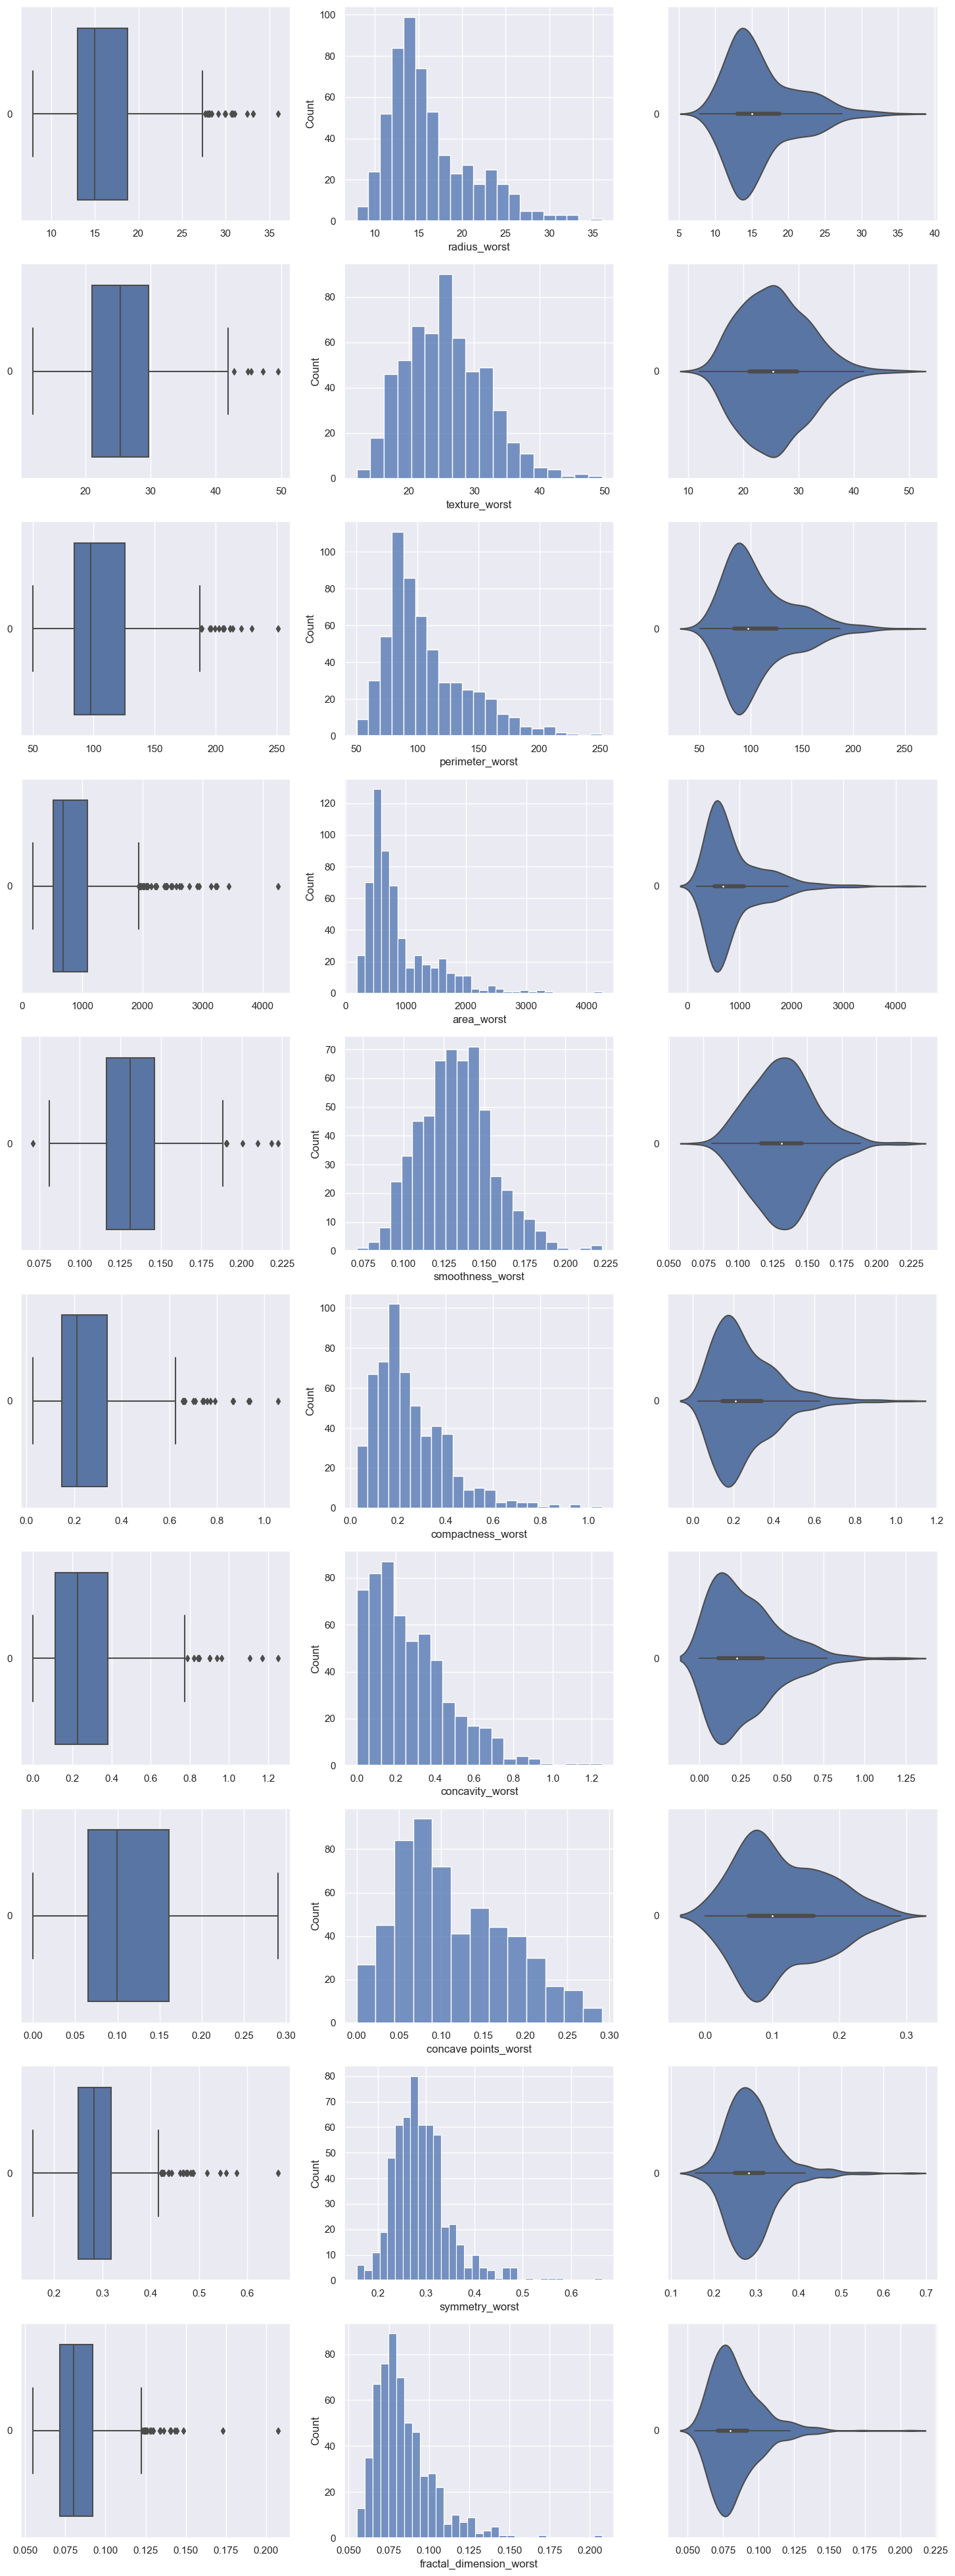

In [140]:
# Draw the distributions of all variables
f, axes = plt.subplots(10, 3, figsize=(18, 50))

count = 0
for var in numDF:
    sb.boxplot(data = numDF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numDF[var], ax = axes[count,1])
    sb.violinplot(data = numDF[var], orient = "h", ax = axes[count,2])
    
    count += 1

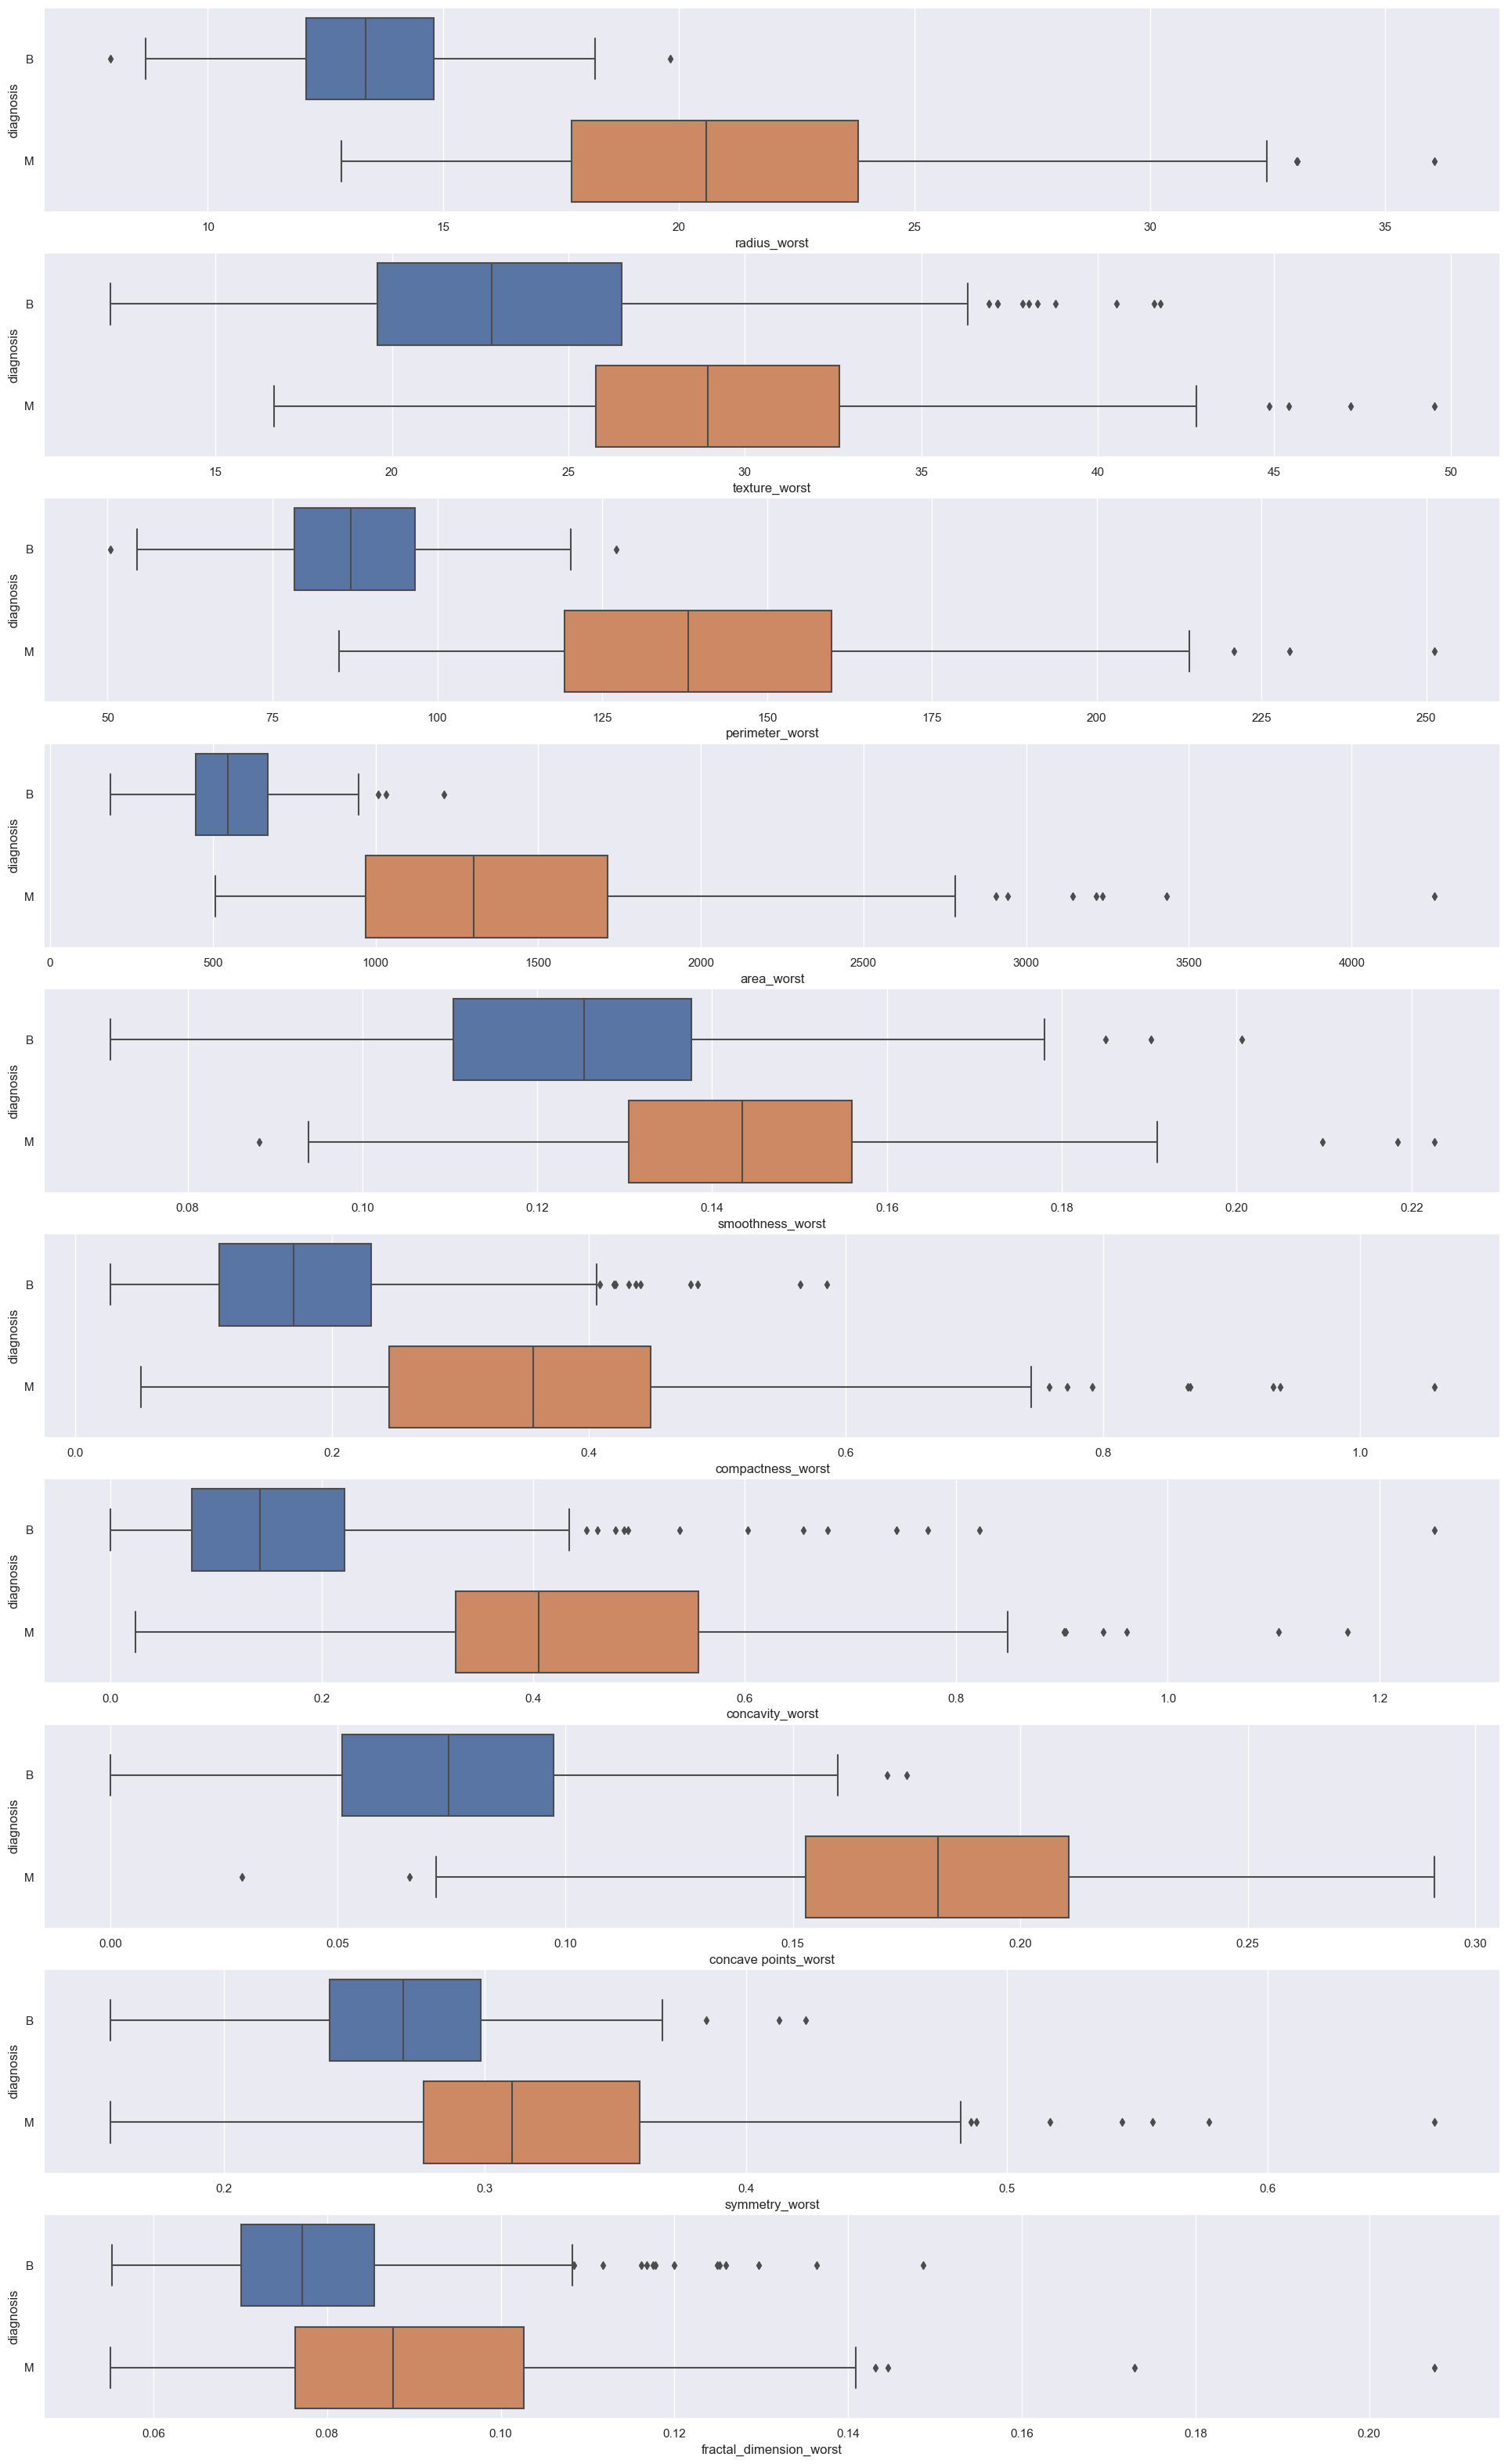

In [141]:
# # Create box-plot for each Variables
f, axes = plt.subplots(10, figsize=(24,40))

# # Define the desired order of categories
diagnosis_order = ['B', 'M']  # Assuming 'M' and 'B' are the categories in your 'diagnosis' variable

count = 0
for var in numDF:
    sb.boxplot(data = cancerdata, y = 'diagnosis', x = var, orient = "h", ax = axes[count], order=diagnosis_order)
    count += 1

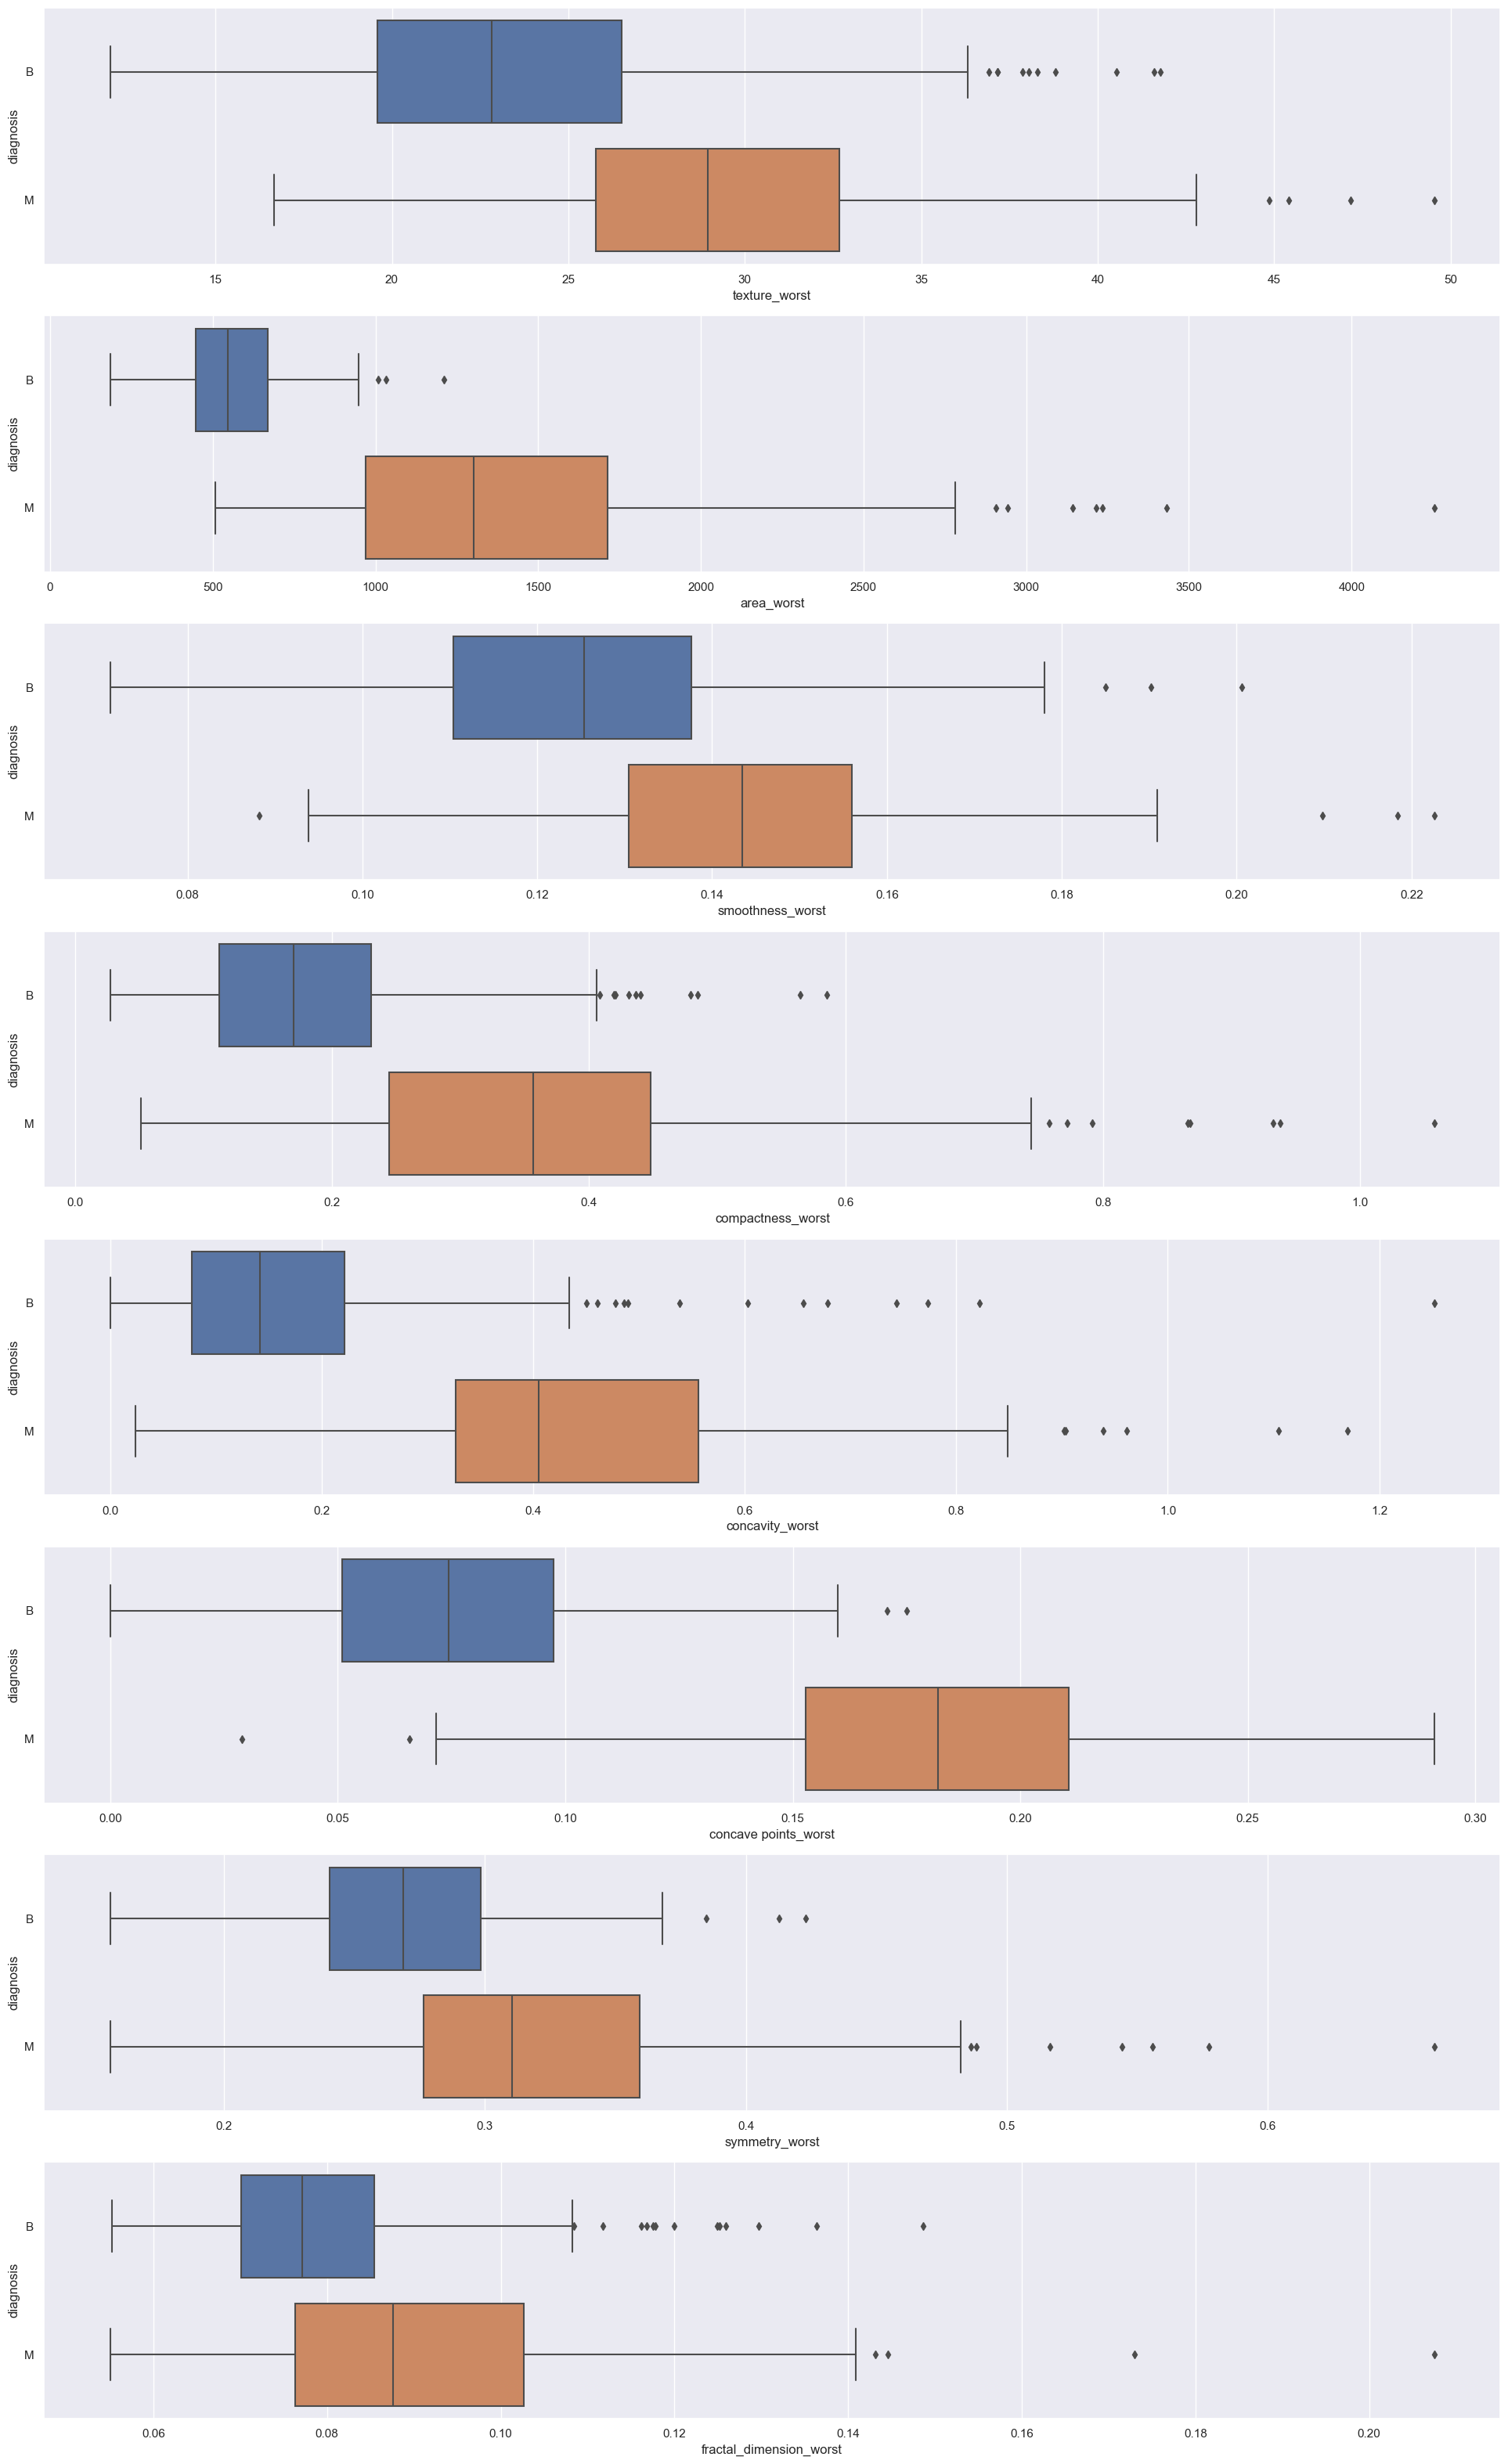

In [142]:
# Since "area_worst", "radius_worst", "perimeter_worst" are similar to each other respectively, we only pick 1 out of them.

# Drop multiple variables
variables_to_drop = ['radius_worst', 'perimeter_worst']
numDF.drop(variables_to_drop, axis=1, inplace=True)

# Create box-plot for each Variable
f, axes = plt.subplots(8, figsize=(24,40))

count = 0
for var in numDF:
    sb.boxplot(data = cancerdata, y = 'diagnosis', x = var, orient = "h", ax = axes[count], order=diagnosis_order)
    count += 1

In [143]:
# From the diagram above, it is obvious that the top 3 variables which have the most significant effects on 'Diagnosis' is:
# 'concave points_worst' & 'area_worst' & 'concavity_worst'
# (Across all 3 variables) there are about 50% of data points with Malignant Tumors have greater concave points, area and concavity compared to those with Benign Tumors
# This implies there are some sort of relationship between 'Diagnosis' and those 3 variables.

# We create a cleandata of 'Diagnosis' and those 3 variables
cleandata = pd.DataFrame(cancerdata[["diagnosis","concavity_worst","area_worst","concave points_worst"]])
cleandata.head()

,diagnosis,concavity_worst,area_worst,concave points_worst
0,M,0.7119,2019.0,0.2654
1,M,0.2416,1956.0,0.1860
2,M,0.4504,1709.0,0.2430
3,M,0.6869,567.7,0.2575
4,M,0.4000,1575.0,0.1625


## DATA VI

diagnosis
B    357
M    212
Name: count, dtype: int64


/Users/maeko/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


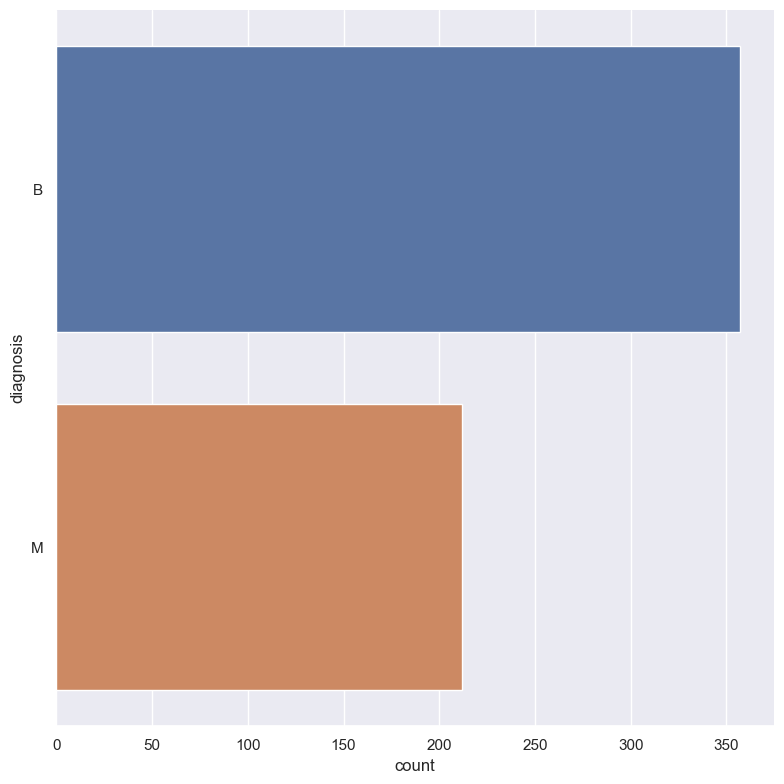

In [144]:
print(cancerdata["diagnosis"].value_counts())

diagnosis_order = ['B', 'M']

sb.catplot(y = "diagnosis", 
           data = cancerdata, 
           kind = "count", 
           height = 8, 
           #order = cancerdata["diagnosis"].value_counts().index,
          order = diagnosis_order)

After cleaning the data, we will now proceed to exploring the data analysis and visualisation to gather relevant insights.

We first look at the relationship between "diagnosis" and "concavity_worst"

In [145]:
cleandata.describe()

,concavity_worst,area_worst,concave points_worst
count,569.000000,569.000000,569.000000
mean,0.272188,880.583128,0.114606
std,0.208624,569.356993,0.065732
min,0.000000,185.200000,0.000000
25%,0.114500,515.300000,0.064930
50%,0.226700,686.500000,0.099930
75%,0.382900,1084.000000,0.161400
max,1.252000,4254.000000,0.291000


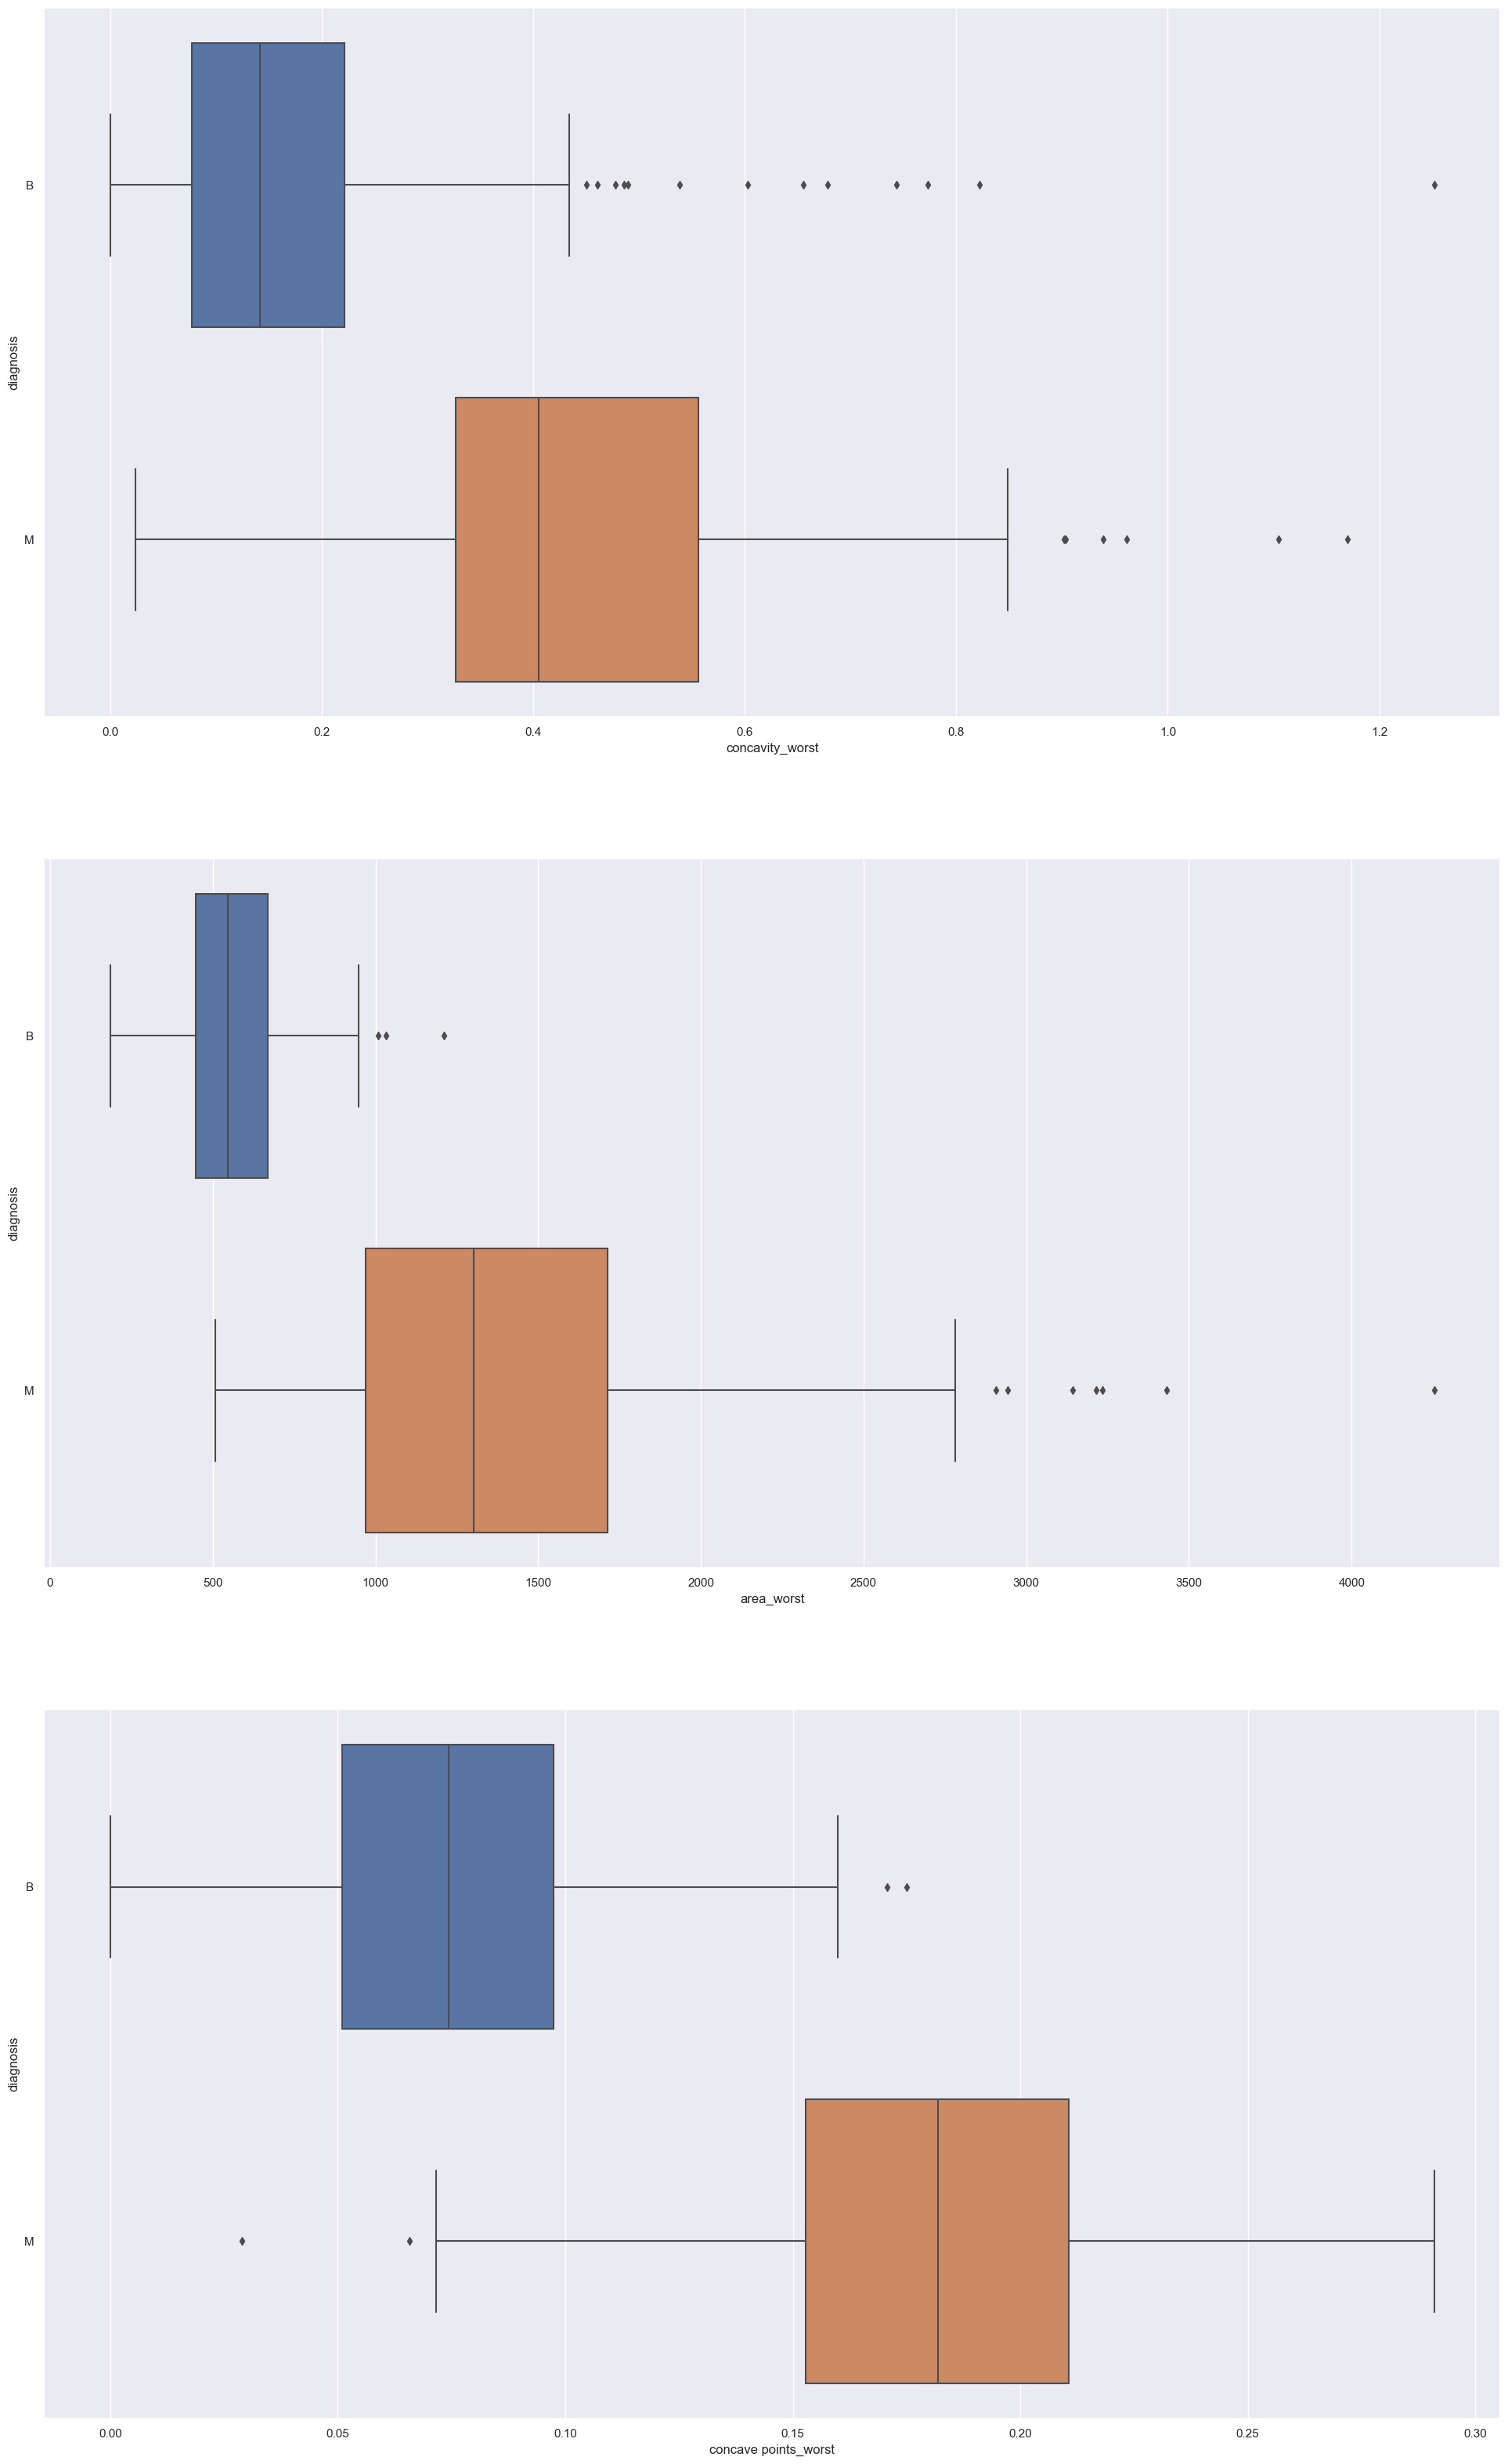

In [146]:
cleanNumData = pd.DataFrame(cancerdata[["concavity_worst","area_worst","concave points_worst"]])

# Create box-plot for each Variable
f, axes = plt.subplots(3, figsize=(24,40))

count = 0
for var in cleanNumData:
    sb.boxplot(data = cancerdata, y = 'diagnosis', x = var, orient = "h", ax = axes[count], order=diagnosis_order)
    count += 1


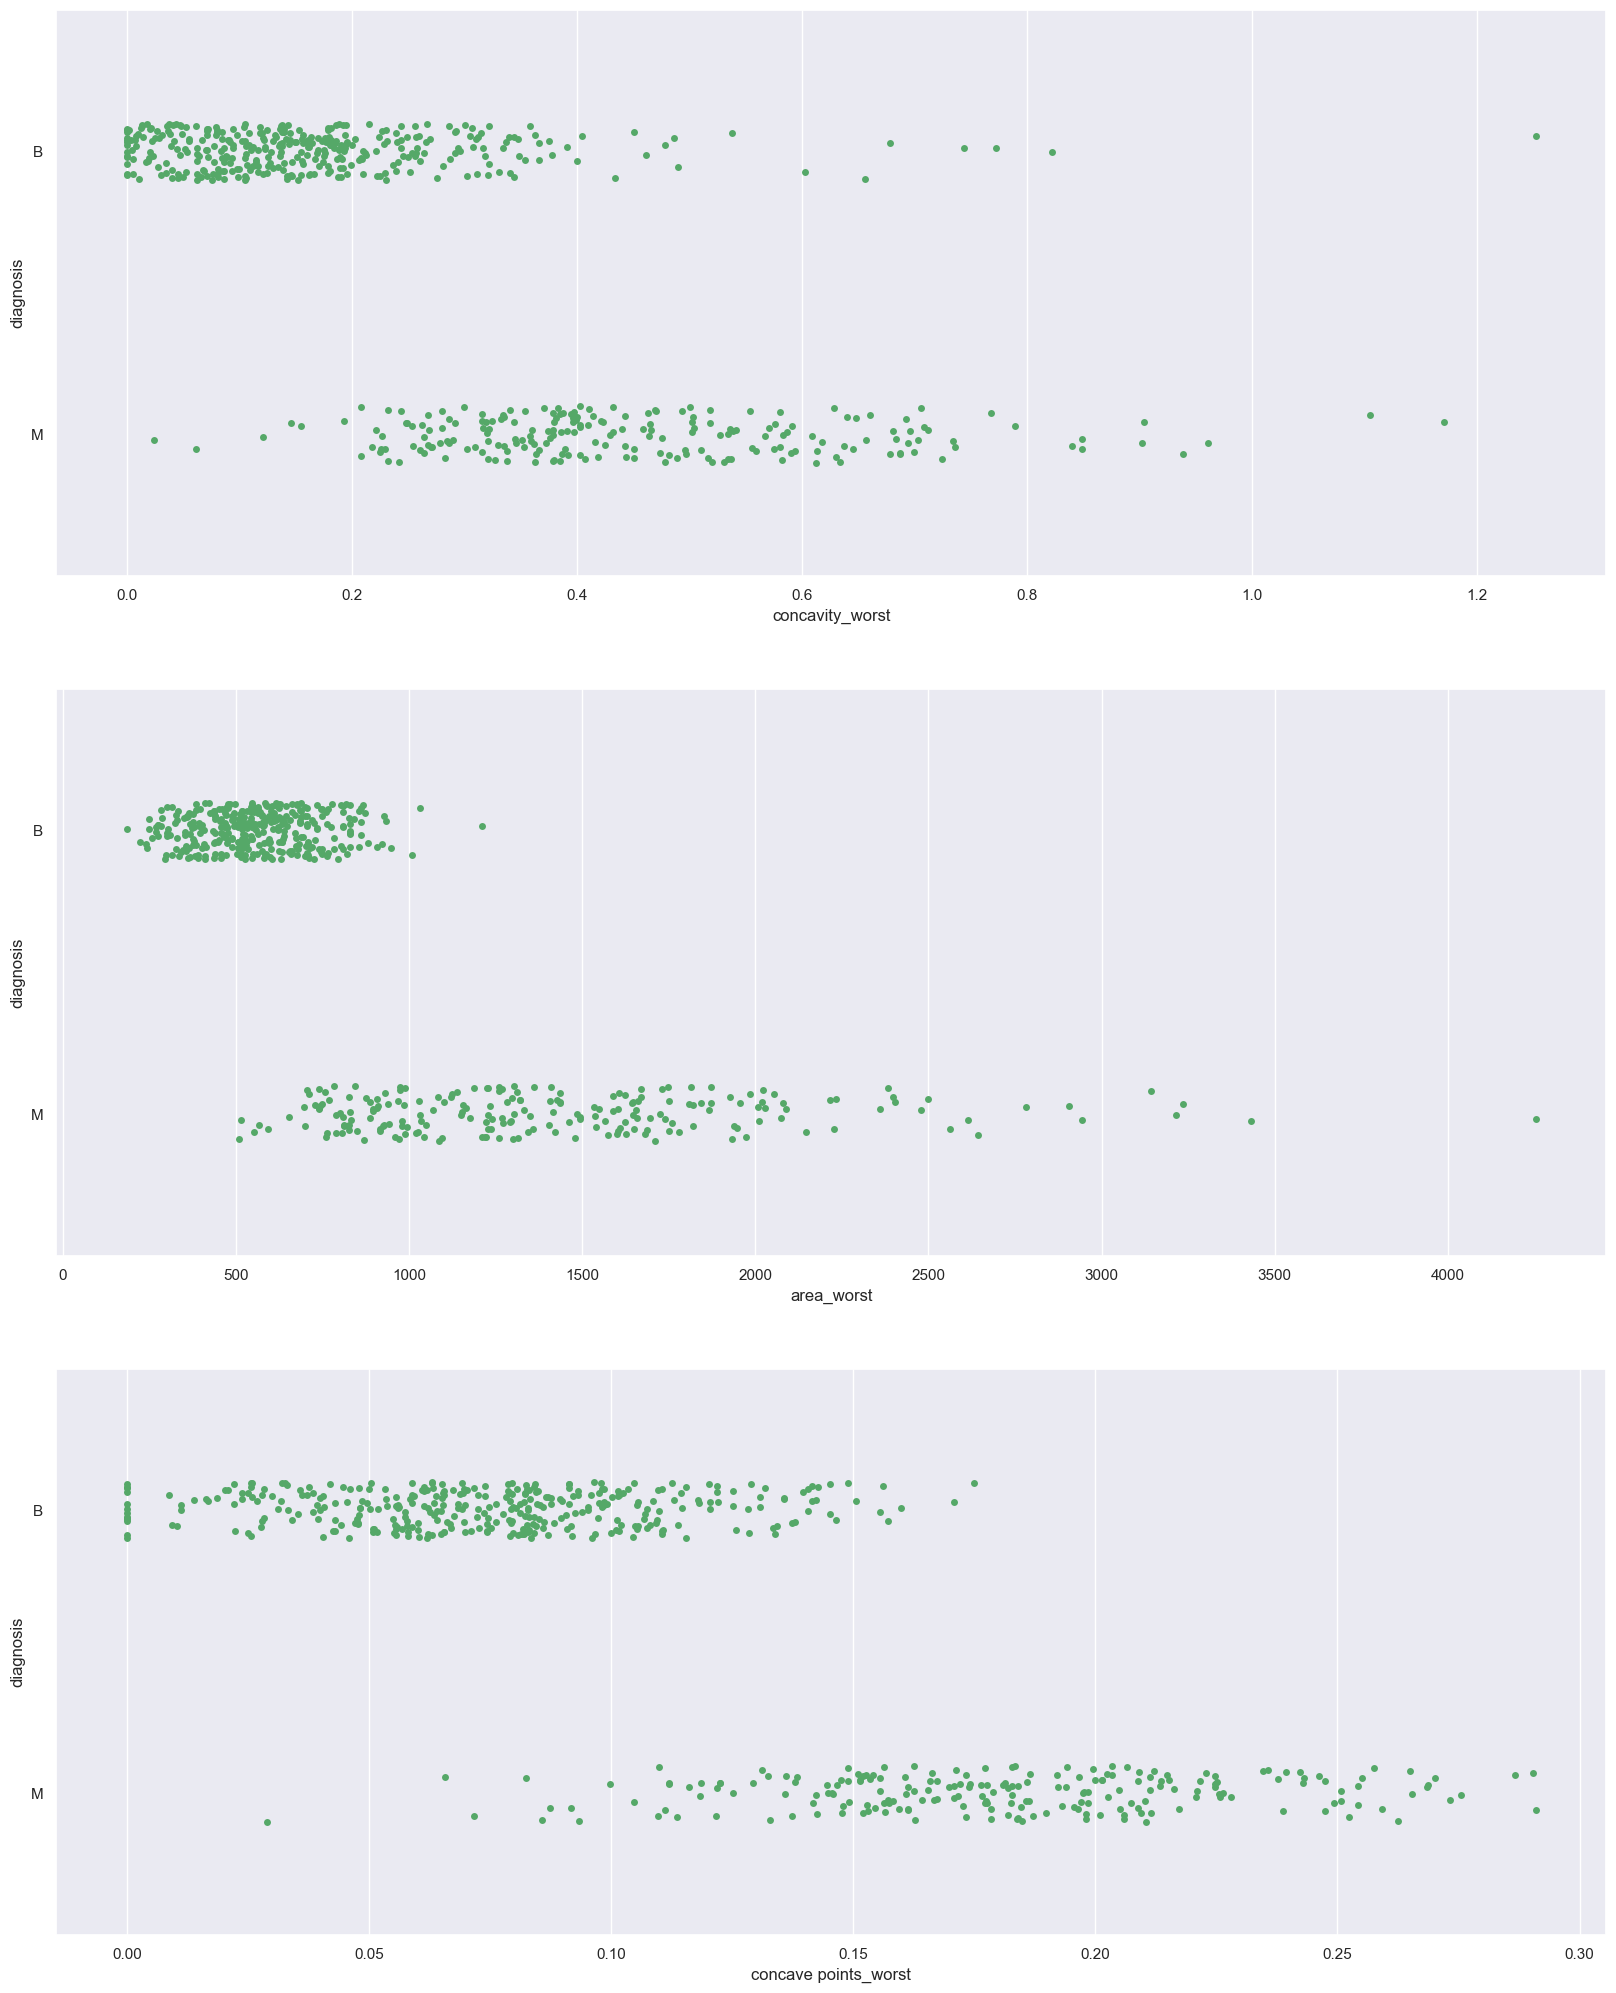

In [147]:
# Create Stripplot for each Variable
f, axes = plt.subplots(3, figsize=(20,25))


count = 0
for var in cleanNumData:
    sb.stripplot(data = cancerdata, y = 'diagnosis', x = var, orient = "h", color = 'g', ax = axes[count], order=diagnosis_order)
    count += 1



## Data splitting / classification

Train set dimensions :  (426, 1) (426, 1)
Test set dimensions :  (143, 1) (143, 1)


Text(0.5, 1.0, 'Confusion Matrix - Test')

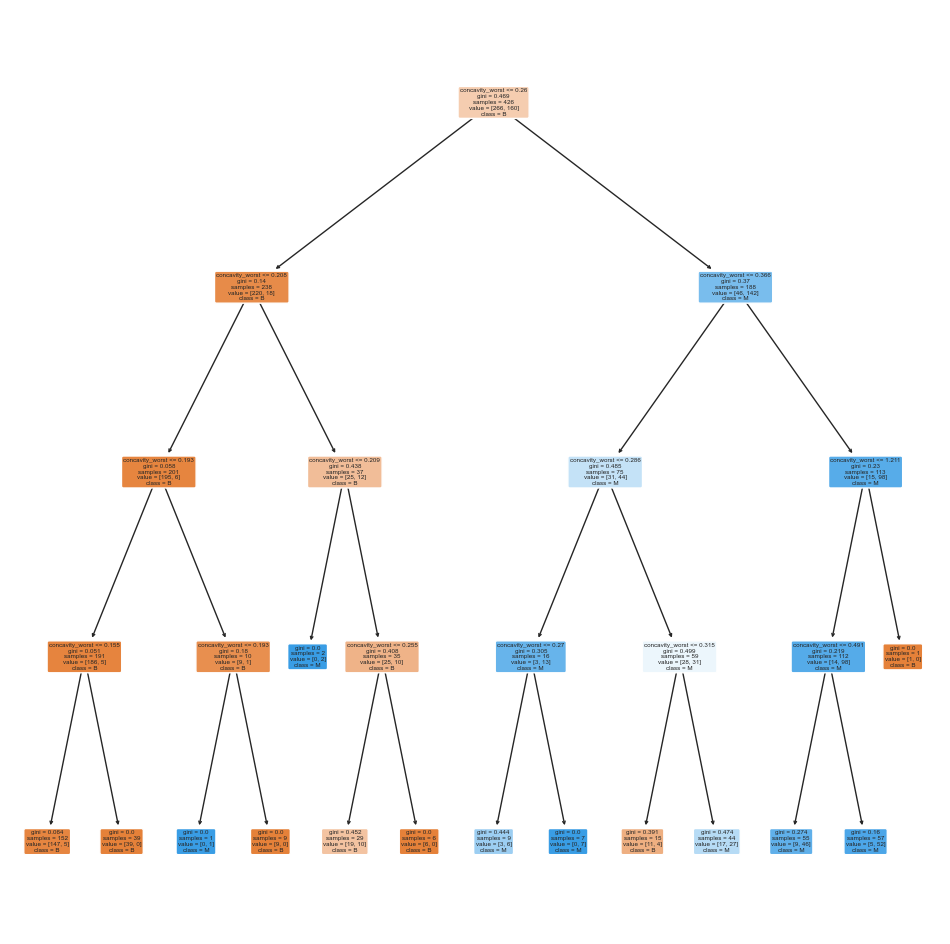

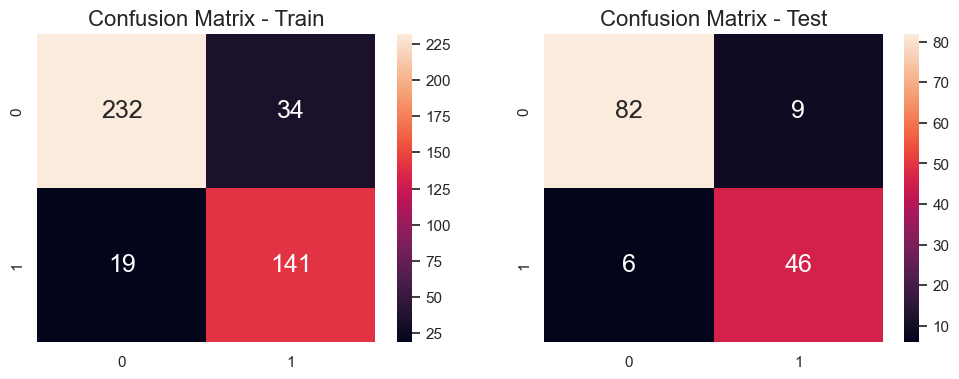

In [156]:
# MAX DEPTH = 4

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

diagnosis = pd.DataFrame(cleandata['diagnosis'])  # Response
concavity = pd.DataFrame(cleandata['concavity_worst'])    # Predictor

# Split the diagnosis-concavity_worst Dataset into Train and Test
from sklearn.model_selection import train_test_split
diag_train, diag_test, concavity_train, concavity_test = train_test_split(concavity, diagnosis, test_size = 0.25, random_state = 16)

# Check the train & test set
print("Train set dimensions : ", diag_train.shape, concavity_train.shape)
print("Test set dimensions : ", diag_test.shape, concavity_test.shape)

# Decision Tree using Train Data
concavitydectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
concavitydectree.fit(diag_train, concavity_train)         # train the decision tree model

# Predict diagnosis values corresponding to concavity_worst
concavity_train_pred = concavitydectree.predict(diag_train)
concavity_test_pred = concavitydectree.predict(diag_test)


# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(concavitydectree, filled=True, rounded=True, 
          feature_names=["concavity_worst"], 
          class_names=["B","M"])


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(concavity_train, concavity_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Confusion Matrix - Train', fontsize=16)
sb.heatmap(confusion_matrix(concavity_test, concavity_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Confusion Matrix - Test', fontsize=16)

In [157]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", concavitydectree.score(diag_train, concavity_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", concavitydectree.score(diag_test, concavity_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(concavity_train, concavity_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

cmTest = confusion_matrix(concavity_test, concavity_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8755868544600939

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8951048951048951

TPR Train :	 0.88125
TNR Train :	 0.8721804511278195

FPR Train :	 0.12781954887218044
FNR Train :	 0.11875

TPR Test :	 0.8846153846153846
TNR Test :	 0.9010989010989011

FPR Test :	 0.0989010989010989
FNR Test :	 0.11538461538461539


Next, we will be working with "concave points_worst"

Train set dimensions :  (426, 1) (426, 1)
Test set dimensions :  (143, 1) (143, 1)


Text(0.5, 1.0, 'Confusion Matrix - Test')

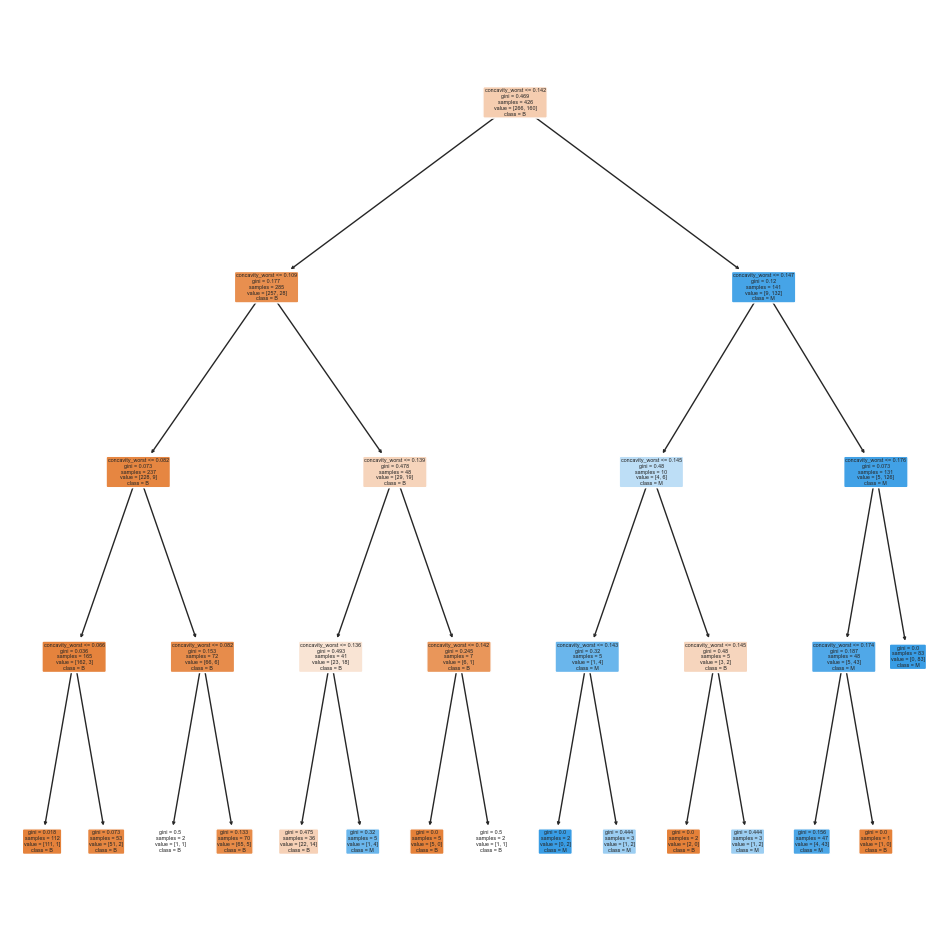

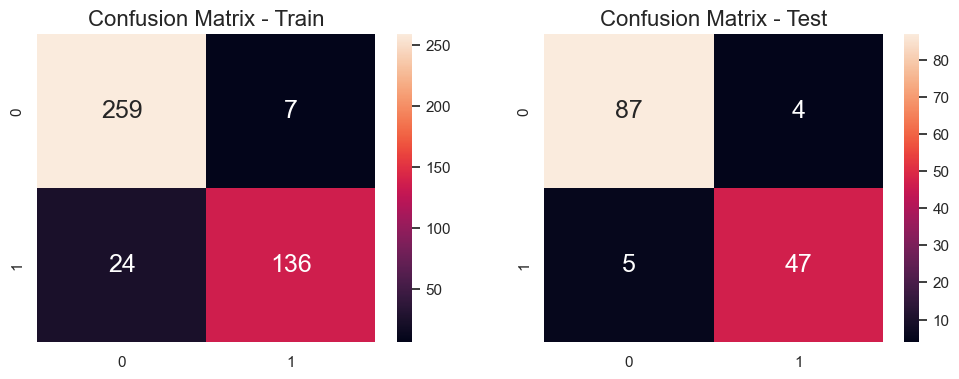

In [150]:
# MAX DEPTH = 4

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

diagnosis = pd.DataFrame(cleandata['diagnosis'])  # Response
concave = pd.DataFrame(cleandata['concave points_worst'])    # Predictor

# Split the diagnosis-concave_worst Dataset into Train and Test
from sklearn.model_selection import train_test_split
diag_train, diag_test,concave_train, concave_test = train_test_split(concave, diagnosis, test_size = 0.25, random_state = 16)

# Check the train & test set
print("Train set dimensions : ", diag_train.shape, concave_train.shape)
print("Test set dimensions : ", diag_test.shape, concave_test.shape)


# Decision Tree using Train Data
concavedectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
concavedectree.fit(diag_train, concave_train)                    # train the decision tree model

# Predict diagnosis values corresponding to concavity_worst
concave_train_pred = concavedectree.predict(diag_train)
concave_test_pred = concavedectree.predict(diag_test)


# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(concavedectree, filled=True, rounded=True, 
          feature_names=["concavity_worst"], 
          class_names=["B","M"])



# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(concave_train, concave_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Confusion Matrix - Train', fontsize=16)
sb.heatmap(confusion_matrix(concave_test, concave_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Confusion Matrix - Test', fontsize=16)

In [151]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", concavedectree.score(diag_train, concave_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", concavedectree.score(diag_test, concave_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(concave_train, concave_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

cmTest = confusion_matrix(concave_test, concave_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9272300469483568

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9370629370629371

TPR Train :	 0.85
TNR Train :	 0.9736842105263158

FPR Train :	 0.02631578947368421
FNR Train :	 0.15

TPR Test :	 0.9038461538461539
TNR Test :	 0.9560439560439561

FPR Test :	 0.04395604395604396
FNR Test :	 0.09615384615384616


Lastly, we move on to "area_worst".

Train set dimensions :  (426, 1) (426, 1)
Test set dimensions :  (143, 1) (143, 1)


Text(0.5, 1.0, 'Confusion Matrix - Test')

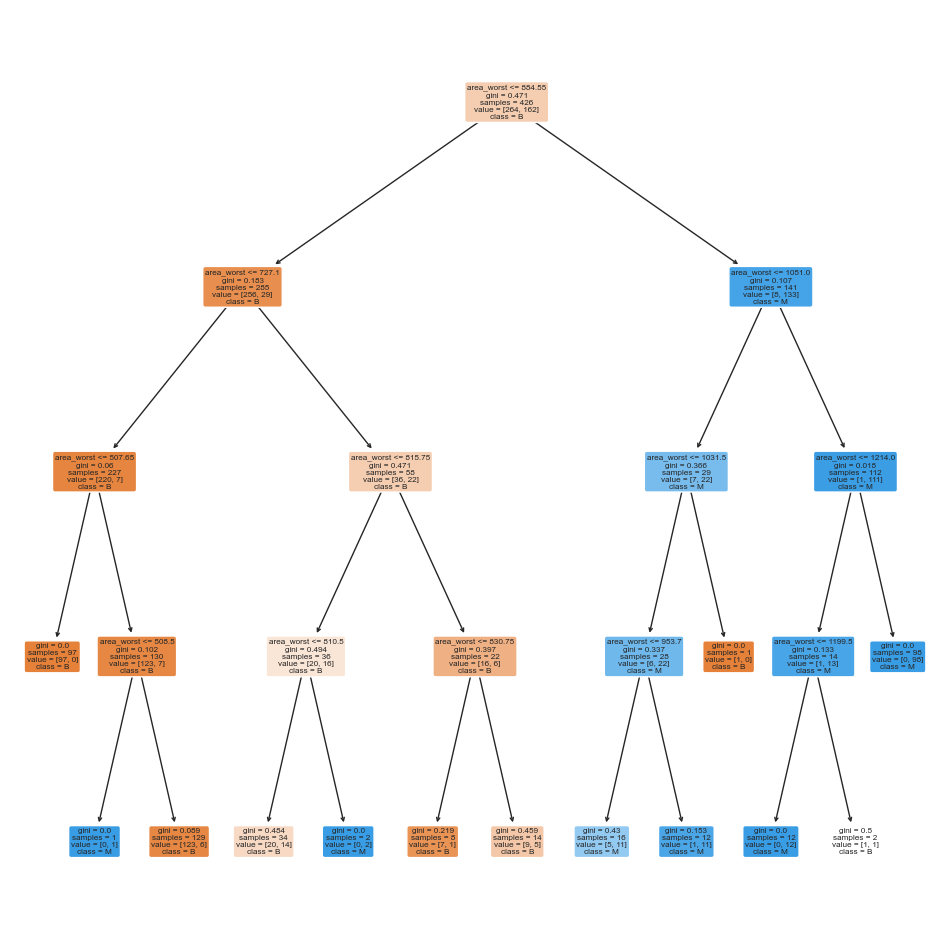

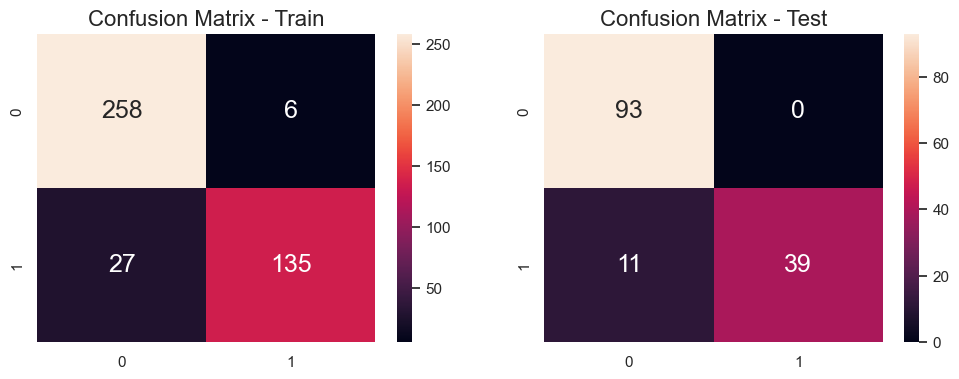

In [152]:
# MAX DEPTH = 4

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

diagnosis = pd.DataFrame(cleandata['diagnosis'])  # Response
area = pd.DataFrame(cleandata['area_worst'])    # Predictor


# Split the diagnosis-area_worst Dataset into Train and Test
from sklearn.model_selection import train_test_split
diag_train, diag_test, area_train, area_test = train_test_split(area, diagnosis, test_size = 0.25, random_state = 11)

# Check the train & test set
print("Train set dimensions : ", diag_train.shape, area_train.shape)
print("Test set dimensions : ", diag_test.shape, area_test.shape)

# Decision Tree using Train Data
areadectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
areadectree.fit(diag_train, area_train)                    # train the decision tree model

# Predict diagnosis values corresponding to concavity_worst
area_train_pred = areadectree.predict(diag_train)
area_test_pred = areadectree.predict(diag_test)


# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(areadectree, filled=True, rounded=True, 
          feature_names=["area_worst"], 
          class_names=["B","M"])

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(area_train, area_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Confusion Matrix - Train', fontsize=16)
sb.heatmap(confusion_matrix(area_test, area_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Confusion Matrix - Test', fontsize=16)

In [153]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", areadectree.score(diag_train, area_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", areadectree.score(diag_test, area_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(area_train, area_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

cmTest = confusion_matrix(area_test, area_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9225352112676056

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9230769230769231

TPR Train :	 0.8333333333333334
TNR Train :	 0.9772727272727273

FPR Train :	 0.022727272727272728
FNR Train :	 0.16666666666666666

TPR Test :	 0.78
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 0.22


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9694835680751174

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9370629370629371



<Axes: >

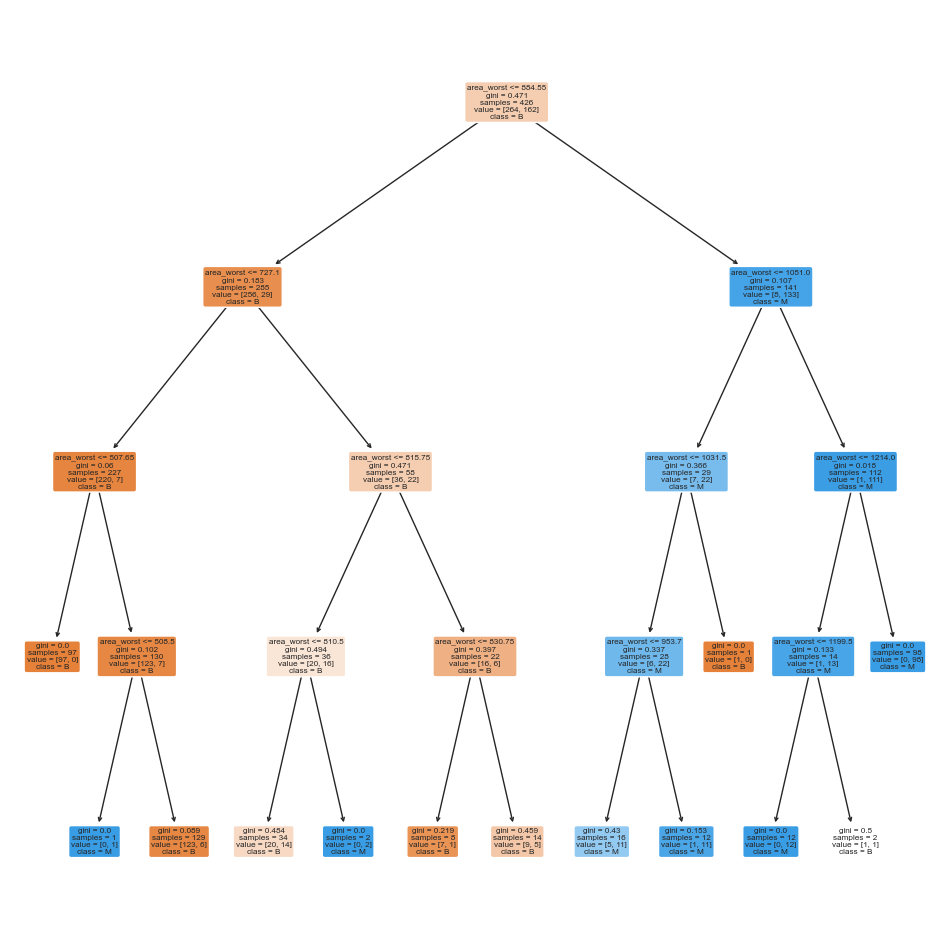

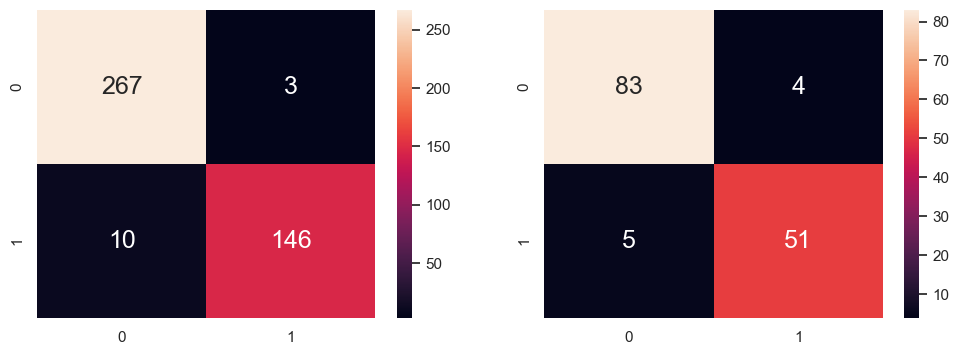

In [158]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Extract Response and Predictors
y = pd.DataFrame(cleandata['diagnosis'])
X = pd.DataFrame(cleandata[["area_worst", "concavity_worst", "concave points_worst"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict diagnosis values corresponding to concavity_worst
dec_train_pred = dectree.predict(X_train)
dec_test_pred = dectree.predict(X_test)


# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(areadectree, filled=True, rounded=True, 
          feature_names=["area_worst"], 
          class_names=["B","M"])


# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [159]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9694835680751174

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9370629370629371

TPR Train :	 0.9358974358974359
TNR Train :	 0.9888888888888889

FPR Train :	 0.011111111111111112
FNR Train :	 0.0641025641025641

TPR Test :	 0.9107142857142857
TNR Test :	 0.9540229885057471

FPR Test :	 0.04597701149425287
FNR Test :	 0.08928571428571429


### Random Forest Classifier with Cross Validation

In [ ]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(cleandata['diagnosis'])
X = pd.DataFrame(cleandata[["area_worst", "concavity_worst", "concave points_worst"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [ ]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2,7)}             # depth of trees 2, 3, 4, 5, 6, 7

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.diagnosis.ravel())

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

In [ ]:
# Import essential models and functions from sklearn
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

# Extract Response and Predictors
y = pd.DataFrame(cleandata['diagnosis'])
X = pd.DataFrame(cleandata[["area_worst", "concavity_worst", "concave points_worst"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 300,  # n_estimators denote number of trees
                                 max_depth = 3)       # set the maximum depth of each tree


# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.diagnosis.ravel())

# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])





In [ ]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))